# Search: Solving a maze

Total Points: 10


The agent has a map of the maze it is in (i.e., the environment is deterministic, discrete, and known). The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  

Here is the small example maze:

In [68]:
f = open("small_maze.txt", "r")
maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Notes:__ 
* This is a planing exercise, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent can just follow the path and does not need percepts. The execution phase is trivial and we do not implement it in this exercise.
* Tree search algorithm implementations that you find online have often a different aim. The algorithms assume that you already have a tree and the goal is to traverse all nodes. We are interested in dynamically creating a search tree with the aim of finding a good/the best path to the goal state. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 
* Some mazes may contain cycles and therefore not form proper trees unless cycles are prevented. 

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the file [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation.

In [69]:
%run maze_helper.py

maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)`
print("Position(8,1):", look(maze, [8, 1]))

Position(0,0): X
Position(8,1): G


Visualize the maze

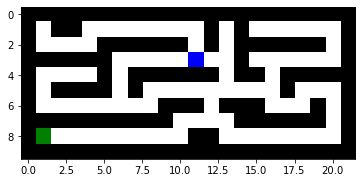

In [70]:
show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [71]:
print("Start location:", find_pos(maze, what = "S"))
print("Goal location:", find_pos(maze, what = "G"))

Start location: [3, 11]
Goal location: [8, 1]


## Tree structures

A basic tree implementation in Python is available at https://github.com/yoyzhou/pyTree (found by John Park).


# Tasks

Implement the following search algorithms for solving different mazes:

* Breadth-first search (BFS)
* Depth-first search (DFS)
* Iterative deepening search (IDS)
* Greedy best-first search (GBFS)
* A* search

Run each of the above algorithms on the 
[small maze](small_maze.txt), 
[medium maze](medium_maze.txt), 
[large maze](large_maze.txt), 
[open maze](open_maze.txt),
[empty maze](empty_maze.txt), 
[wall maze](wall_maze.txt), 
and the 
[loops maze](loops_maze.txt). 
For each problem instance and each search algorithm, report the following in a table:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth searched
* Maximum size of the frontier.

Display each solution by marking every maze square (or state) visited and the squares on the final path.

## Task 1: Defining the search Problem [1 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

* 1: Initial State: The start location (S) in the maze
* 2: Actions: Go east/north/south/west until it hits an obstacle.
* 3: Transition model: If we move the points for 1 steps, it will go east/north/south/west with distance 1(1 space length in the txt).
* 4: Goal state: The goal location (G) in the maze
* 5: Path cost: Since we are assuming one step costs 1, the path cost will be equal to the number of steps.

## Task 2: Breadth-first, Depth-first and iterative deepening search [4 points]

Implement these search strategies. You can implement a generic tree search following the BFS pseudo-code in your textbook and then just adapt the order in which the frontier is explored.

### Breadth First Search:

In [72]:
import maze_helper as helper
from pyTree.Tree import Tree as Tree
from queue import Queue,LifoQueue, PriorityQueue
import math
import copy

def Find_Children(maze, Node):                          # A function use to find all the options for each round of searching
    option = []
    West = [Node[0], Node[1]-1]
    North = [Node[0]-1, Node[1]]
    East = [Node[0], Node[1] + 1]
    South = [Node[0]+ 1, Node[1]]

    if(helper.look(maze, West) != 'X'): option.append(West)
    if(helper.look(maze, East) != 'X'): option.append(East)
    if(helper.look(maze, North) != 'X'): option.append(North)
    if(helper.look(maze, South) != 'X'): option.append(South)
    
    return option

def Find_Distance(NodeonTree,Root):
    Total = 0
    while(NodeonTree != Root):
        NodeonTree = NodeonTree.getParent()
        Total = Total + 1
    return Total

def getResult(maze):                    # It is a function that find final numbers of path cost and area explored
    Result = []
    Cost = 0
    Explored = 0
    
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if(maze[i][j] == 'P' or maze[i][j] == 'G'):
                Cost = Cost + 1
                Explored = Explored + 1
            elif(maze[i][j] == '.'):
                Explored = Explored + 1
    Result.append(Cost)
    Result.append(Explored)
    return Result

def BFS_Search(maze, vis):
    Start = helper.find_pos(maze, what = "S")
    End = helper.find_pos(maze, what = "G")                 #   Set start point and end point
    Result = []
    MaxFrontier = 1
    MaxDepth = 1
    if(Start == End):                                       # If Start is End
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        return Result
    q = Queue(maxsize=(len(maze)*len(maze[0])))             # It is a FIFO queue
    q.put(Start)
    
    Root = Tree(Start)                                      # Use a tree to store all the paths

    while(q.empty() == False):
        if(q.qsize() > MaxFrontier):
            MaxFrontier = q.qsize()
            
        Node = q.get()                                      # Get a node from queue
        NodeonTree = Root.getNode(Node)
        
        depth = Find_Distance(NodeonTree, Root)
        if(MaxDepth < depth):                               # Find the depth of the node
            MaxDepth = depth
            
        children = Find_Children(maze,Node)
        if(vis == True):                                    # Show paths for each round
            if(Node != Start):
                maze[Node[0]][Node[1]] = 'P'                
                helper.show_maze(maze)
                maze[Node[0]][Node[1]] = '.'
            else:
                helper.show_maze(maze)
        for e in children:
            if (e == End):
                newTreeNode = Tree(e)
                NodeonTree.addChild(newTreeNode)
                tempNode = newTreeNode.getParent()
                while(tempNode != Root):
                    maze[tempNode.data[0]][tempNode.data[1]] = 'P'
                    tempNode = tempNode.getParent()                 # Rebuild the path based on the tree                    
                Result = getResult(maze)
                Result.append(MaxFrontier)
                Result.append(MaxDepth)
                return Result
            if(Root.getNode(e) == None):
                newTreeNode = Tree(e)
                maze[e[0]][e[1]] = '.'
                NodeonTree.addChild(newTreeNode)                    # Add child to the tree and to the queue
                q.put(e)
                
    Result.append("Path not found")
    Result.append("Path not found")                             # If no path founded
    Result.append("Path not found")
    Result.append("Path not found")                             # If no path founded
    return Result


Running BFS with  small_maze.txt


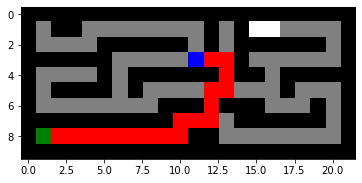

Path cost:  19
Explored squares:  91
Maximum size of the frontier:  8
Maximum tree depth:  18


Running BFS with  medium_maze.txt


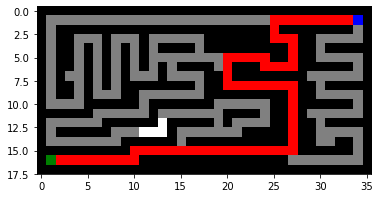

Path cost:  68
Explored squares:  269
Maximum size of the frontier:  8
Maximum tree depth:  67


Running BFS with  large_maze.txt


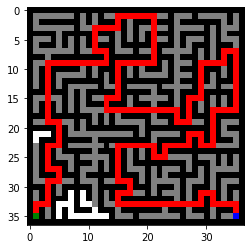

Path cost:  210
Explored squares:  622
Maximum size of the frontier:  8
Maximum tree depth:  209


Running BFS with  empty_maze.txt


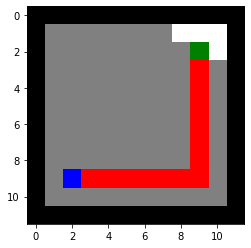

Path cost:  14
Explored squares:  95
Maximum size of the frontier:  12
Maximum tree depth:  13


Running BFS with  wall_maze.txt


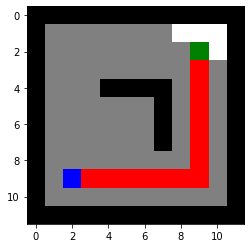

Path cost:  14
Explored squares:  88
Maximum size of the frontier:  11
Maximum tree depth:  13


Running BFS with  loops_maze.txt


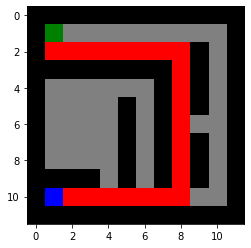

Path cost:  23
Explored squares:  71
Maximum size of the frontier:  7
Maximum tree depth:  22


Running BFS with  open_maze.txt


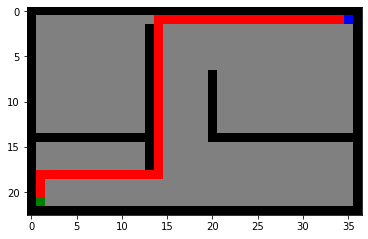

Path cost:  54
Explored squares:  683
Maximum size of the frontier:  23
Maximum tree depth:  53



In [73]:
def BFS_SearchRunner(vis):
    mazes = []    
    mazes.append("small_maze.txt")
    mazes.append("medium_maze.txt")
    mazes.append("large_maze.txt")
    mazes.append("empty_maze.txt")
    mazes.append("wall_maze.txt")
    mazes.append("loops_maze.txt")
    mazes.append("open_maze.txt")

    for e in mazes:
        f = open(e, "r")
        maze_str = f.read()
        maze = helper.parse_maze(maze_str)
        print("\n===================================================")
        print("Running BFS with ", e)
        localResult = BFS_Search(maze,vis)
        helper.show_maze(maze)
        print("Path cost: ", localResult[0])
        print("Explored squares: ", localResult[1])
        print("Maximum size of the frontier: ", localResult[2])
        print("Maximum tree depth: ", localResult[3]) 
        print("===================================================\n")
        
BFS_SearchRunner(False)

#### Breadth First Search Analysis
This Breadth First Search algorithm will loops through top node's neighbours and make branches, after it looked over all the neighbours, it will then go to the next layer. 
* Since It will go to all the places it can go eventually, and the layer is finite, it is complete.
* Since it will search based on layers (step = 1), the shortest path(shortest layer) will be found first, so it is optimal.
* Its Time Complexity is O(b^d) because it has d branches and d layers.
* Its Space Complexity is also O(b^d) because of the branches and depth.

### Depth First Search

In [74]:
def DFS_Search(maze, vis):
    Start = helper.find_pos(maze, what = "S")
    End = helper.find_pos(maze, what = "G")
    Result = []
    MaxFrontier = 1
    MaxDepth = 1
    
    if(Start == End):
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        return Result
    
    q = LifoQueue(maxsize= (len(maze)*len(maze[0])))            # It is a LIFO queue, or called stack
    q.put(Start)
    
    Root = Tree(Start)

    while(q.empty() == False):
        if(q.qsize() > MaxFrontier):
            MaxFrontier = q.qsize()
            
        Node = q.get()
        NodeonTree = Root.getNode(Node)
        
        depth = Find_Distance(NodeonTree, Root)
        if(MaxDepth < depth):                               # Find the depth of the node
            MaxDepth = depth
        
        children = Find_Children(maze,Node)
        if(vis == True):
            if(Node != Start):
                maze[Node[0]][Node[1]] = 'P'
                helper.show_maze(maze)
                maze[Node[0]][Node[1]] = '.'
            else:
                helper.show_maze(maze)
        for e in children:
            if (e == End):
                newTreeNode = Tree(e)
                NodeonTree.addChild(newTreeNode)
                tempNode = newTreeNode.getParent()
                while(tempNode != Root):
                    maze[tempNode.data[0]][tempNode.data[1]] = 'P'
                    tempNode = tempNode.getParent()                 # Rebuild the path based on the tree                    
                Result = getResult(maze)
                Result.append(MaxFrontier)
                Result.append(MaxDepth)
                return Result
            if(Root.getNode(e) == None):
                newTreeNode = Tree(e)
                maze[e[0]][e[1]] = '.'
                NodeonTree.addChild(newTreeNode)                    # Add child to the tree and to the queue
                q.put(e)
                
    Result.append("Path not found")
    Result.append("Path not found")                             # If no path founded
    Result.append("Path not found")
    Result.append("Path not found")
    return Result


Running DFS with  small_maze.txt


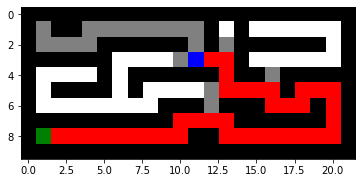

Path cost:  37
Explored squares:  56
Maximum size of the frontier:  6
Maximum tree depth:  36


Running DFS with  medium_maze.txt


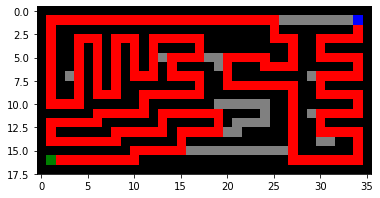

Path cost:  232
Explored squares:  273
Maximum size of the frontier:  11
Maximum tree depth:  231


Running DFS with  large_maze.txt


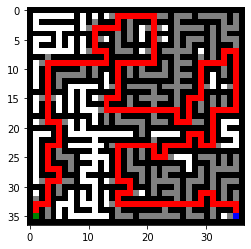

Path cost:  210
Explored squares:  461
Maximum size of the frontier:  32
Maximum tree depth:  209


Running DFS with  empty_maze.txt


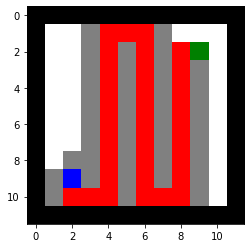

Path cost:  34
Explored squares:  72
Maximum size of the frontier:  39
Maximum tree depth:  33


Running DFS with  wall_maze.txt


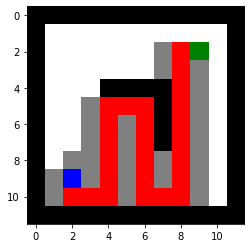

Path cost:  26
Explored squares:  51
Maximum size of the frontier:  25
Maximum tree depth:  25


Running DFS with  loops_maze.txt


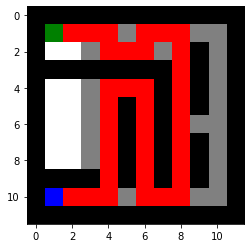

Path cost:  37
Explored squares:  59
Maximum size of the frontier:  12
Maximum tree depth:  39


Running DFS with  open_maze.txt


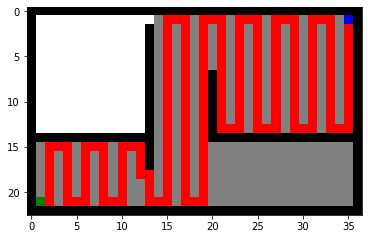

Path cost:  226
Explored squares:  526
Maximum size of the frontier:  194
Maximum tree depth:  225



In [75]:
def DFS_SearchRunner(vis):
    mazes = []    
    mazes.append("small_maze.txt")
    mazes.append("medium_maze.txt")
    mazes.append("large_maze.txt")
    mazes.append("empty_maze.txt")
    mazes.append("wall_maze.txt")
    mazes.append("loops_maze.txt")
    mazes.append("open_maze.txt")

    for e in mazes:
        f = open(e, "r")
        maze_str = f.read()
        maze = helper.parse_maze(maze_str)
        print("\n===================================================")
        print("Running DFS with ", e)
        localResult = DFS_Search(maze,vis)
        helper.show_maze(maze)
        print("Path cost: ", localResult[0])
        print("Explored squares: ", localResult[1])
        print("Maximum size of the frontier: ", localResult[2])
        print("Maximum tree depth: ", localResult[3]) 
        print("===================================================\n")
        
DFS_SearchRunner(False)

#### Depth First Search Analysis
This Depth First Search algorithm will loops through node's neighbours and make branches, for each neighbour, it will keep digging until there is no more child.
* Although many of mazes are infinite-depth spaces, the program will record all the places it visited, so it is complete.
* Since it will always keep digging (ex. from left to right), so it may not be able to find the shortest path(if the path is close to right); it is not optimal. 
* Its Time Complexity is O(b^m) and m is the maximum depth because DFS will always dig to the deepest place where no more child.
* Its Space Complexity is O(bm) because it explores one path at a time.

### Iterative Deepening Search

In [76]:
def Get_layer(TreeNode, Root):
    layer = 0
    while(TreeNode != Root):
        layer = layer + 1
        TreeNode = TreeNode.getParent()
    return layer

def Find_DLS_Children(maze, Node, NodeonTree, Root):
    option = []
    West = [Node[0], Node[1]-1]
    North = [Node[0]-1, Node[1]]
    East = [Node[0], Node[1] + 1]
    South = [Node[0]+ 1, Node[1]]
    
    tempNodeW = Root.getNode(West)
    tempNodeE = Root.getNode(East)              
    tempNodeN = Root.getNode(North)
    tempNodeS = Root.getNode(South)
    OldDistance = Find_Distance(NodeonTree, Root) + 1
    if(helper.look(maze, West) != 'X'):                     
        if(tempNodeW != None):
             if(Find_Distance(tempNodeW,Root) > OldDistance):           # If the node is on the tree but with higher distance
                Root.delNode(West)
                option.append(West)
        else:
            option.append(West)
    if(helper.look(maze, East) != 'X'): 
        if(tempNodeE != None):
             if(Find_Distance(tempNodeE,Root) > OldDistance):
                Root.delNode(East)
                option.append(East)
        else:
            option.append(East)
    if(helper.look(maze, North) != 'X'): 
        if(tempNodeN != None):
             if(Find_Distance(tempNodeN,Root) > OldDistance):
                Root.delNode(North)
                option.append(North)
        else:
            option.append(North)
    if(helper.look(maze, South) != 'X'): 
        if(tempNodeS != None):
             if(Find_Distance(tempNodeS,Root) > OldDistance):
                Root.delNode(South)
                option.append(South)
        else:
            option.append(South)
    return option


def DLS_Search(maze,vis,depth):
    Start = helper.find_pos(maze, what = "S")
    End = helper.find_pos(maze, what = "G")
    Result = []
    MaxFrontier = 1
    MaxDepth = 1                                    # The maximum number will always show with longest distance

    if(Start == End):
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        return Result
    
    q = LifoQueue(maxsize= (len(maze)*len(maze[0])))                # It is a LIFO queue like DFS
    Root = Tree(Start)
    q.put(Root)
    layer = 0
    
    while(q.empty() == False):
        if(q.qsize() > MaxFrontier):
            MaxFrontier = q.qsize()
            
            
        NodeonTree = q.get()
        Node = NodeonTree.data
        layer = Get_layer(NodeonTree, Root)
        
        if(layer > MaxDepth):
            MaxDepth = layer
        
        if(layer < depth):
            children = Find_DLS_Children(maze,Node,NodeonTree,Root)
            if(vis == True):
                if(Node != Start):
                    maze[Node[0]][Node[1]] = 'P'
                    helper.show_maze(maze)
                    maze[Node[0]][Node[1]] = '.'
                else:
                   helper.show_maze(maze)
            for e in children:
                if (e == End):
                    newTreeNode = Tree(e)
                    NodeonTree.addChild(newTreeNode)
                    tempNode = newTreeNode.getParent()
                    while(tempNode != Root):
                        maze[tempNode.data[0]][tempNode.data[1]] = 'P'
                        tempNode = tempNode.getParent()                 # Rebuild the path based on the tree                    
                    Result = getResult(maze)
                    Result.append(MaxFrontier)
                    Result.append(MaxDepth)
                    return Result
                newTreeNode = Tree(e)
                maze[e[0]][e[1]] = '.'
                NodeonTree.addChild(newTreeNode)                    # Add child to the tree and to the queue
                q.put(newTreeNode)
    Result.append("Path not found")
    Result.append("Path not found")
    Result.append("Path not found")
    Result.append("Path not found")
    return Result
    
    
def IDS_Search(maze, vis):
    result = []
    result.append("Path not found")
    result.append("Path not found")
    i = 1                                             # i is started in 1
    while(result[0] == "Path not found"):               # i is the layer and the upper bound of IDS to avoid the program stuck in loop
        result = DLS_Search(maze, vis, i)
        i = i + 1
    return result


Running IDS with  small_maze.txt


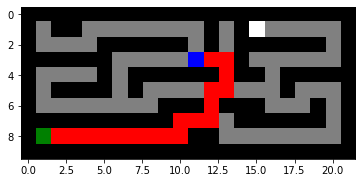

Path cost:  19
Explored squares:  92
Maximum size of the frontier:  5
Maximum tree depth:  19


Running IDS with  medium_maze.txt


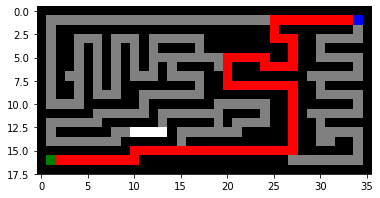

Path cost:  68
Explored squares:  269
Maximum size of the frontier:  7
Maximum tree depth:  68


Running IDS with  large_maze.txt


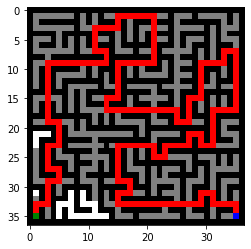

Path cost:  210
Explored squares:  619
Maximum size of the frontier:  32
Maximum tree depth:  209


Running IDS with  empty_maze.txt


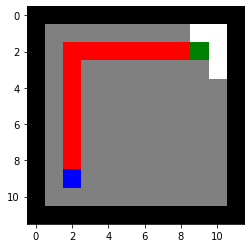

Path cost:  14
Explored squares:  95
Maximum size of the frontier:  22
Maximum tree depth:  14


Running IDS with  wall_maze.txt


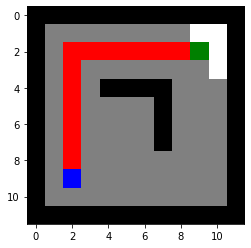

Path cost:  14
Explored squares:  88
Maximum size of the frontier:  20
Maximum tree depth:  14


Running IDS with  loops_maze.txt


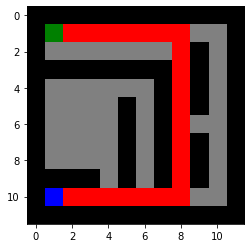

Path cost:  23
Explored squares:  71
Maximum size of the frontier:  10
Maximum tree depth:  23


Running IDS with  open_maze.txt


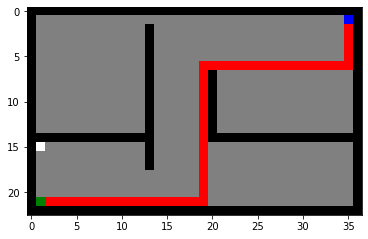

Path cost:  54
Explored squares:  682
Maximum size of the frontier:  49
Maximum tree depth:  54



In [77]:
def IDS_SearchRunner(vis):
    mazes = []    
    mazes.append("small_maze.txt")
    mazes.append("medium_maze.txt")
    mazes.append("large_maze.txt")
    mazes.append("empty_maze.txt")
    mazes.append("wall_maze.txt")
    mazes.append("loops_maze.txt")
    mazes.append("open_maze.txt")

    for e in mazes:
        f = open(e, "r")
        maze_str = f.read()
        maze = helper.parse_maze(maze_str)
        print("\n===================================================")
        print("Running IDS with ", e)
        localResult = IDS_Search(maze,vis)
        helper.show_maze(maze)
        print("Path cost: ", localResult[0])
        print("Explored squares: ", localResult[1])
        print("Maximum size of the frontier: ", localResult[2])
        print("Maximum tree depth: ", localResult[3]) 
        print("===================================================\n")
        
IDS_SearchRunner(False)

#### Iterative Deepening Search Analysis
This Iterative Deepening Search algorithm is similar to DFS, but it is restricted by layers. There is a for-loop to go through each lay, and for each round it will do Depth-First Search.
* It will check visited path to avoid loop, so it is complete
* It will implement DFS based on layers, so it will always find the shortest path like BFS; it is optimal
* Its Time Complexity is O(b^d) because it searchs like BFS.
* Its Space Complexity is O(bd) because it will not go to the deepest layer.

## Task 3: Greedy best-first search [2 points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function.

In [79]:
def Find_Child(maze, Node, End, Dtype, Visited):
    West = [Node[0], Node[1]-1]
    North = [Node[0]-1, Node[1]]
    East = [Node[0], Node[1] + 1]
    South = [Node[0]+ 1, Node[1]]
    BestNode = [-1,-1]
    BestDistance = 0
    if(helper.look(maze, West) != 'X' and West not in Visited):         # Find Children with best h(n)
        if(West == End):
            return West
        else:
            maze[West[0]][West[1]] = '.'
            Distance = 0
            if(Dtype == "MA"):
                Distance = abs(West[0] - End[0]) + abs(West[1] - End[1])
            elif(Dtype == "EU"):
                Distance =  math.sqrt((abs(West[0] - End[0]))**2 + (abs(West[1] - End[1]))**2)  
            if(Distance <= BestDistance or BestDistance == 0):
                BestNode = West
                BestDistance = Distance
    if(helper.look(maze, East) != 'X' and East not in Visited):
        if(East == End):
            return East
        else:
            maze[East[0]][East[1]] = '.'
            Distance = 0
            if(Dtype == "MA"):
                Distance = abs(East[0] - End[0]) + abs(East[1] - End[1])
            elif(Dtype == "EU"):
                Distance =  math.sqrt((abs(East[0] - End[0]))**2 + (abs(East[1] - End[1]))**2)
            if(Distance <= BestDistance or BestDistance == 0):
                BestNode = East
                BestDistance = Distance
    if(helper.look(maze, North) != 'X'and North not in Visited): 
        if(North == End):
            return North
        else:
            maze[North[0]][North[1]] = '.'
            Distance = 0
            if(Dtype == "MA"):
                Distance = abs(North[0] - End[0]) + abs(North[1] - End[1])
            elif(Dtype == "EU"):
                Distance =  math.sqrt((abs(North[0] - End[0]))**2 + (abs(North[1] - End[1]))**2)
            if(Distance <= BestDistance or BestDistance == 0):
                BestNode = North
                BestDistance = Distance
    if(helper.look(maze, South) != 'X' and South not in Visited): 
        if(South == End):
            return South
        else:
            maze[South[0]][South[1]] = '.'
            Distance = 0
            if(Dtype == "MA"):
                Distance = abs(South[0] - End[0]) + abs(South[1] - End[1])
            elif(Dtype == "EU"):
                Distance =  math.sqrt((abs(South[0] - End[0]))**2 + (abs(South[1] - End[1]))**2)
            if(Distance <= BestDistance or BestDistance == 0):
                BestNode = South
                BestDistance = Distance        # Best Node is a list with the best child nearby and the number of area explored
    return BestNode
    
    
    

def GBFS_Search(maze, vis, Dtype):
    Start = helper.find_pos(maze, what = "S")
    End = helper.find_pos(maze, what = "G")
    Result = []
    Visited = []
    PathCost = 0
    AreaExplored = 0
    MaxFrontier = 1
    MaxDepth = 1
    
    if(Start == End):
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        return Result
    
    Path = LifoQueue(maxsize= (len(maze)*len(maze[0])))
    Path.put(Start)
    Visited.append(Start)
    
    while(Path.empty != False):
        if(Path.qsize() > MaxFrontier):
            MaxFrontier = Path.qsize()
        Node = Path.get()
        NewNode = Find_Child(maze,Node,End,Dtype, Visited)
        if(NewNode[0] != -1):
            if(NewNode == End):
                Result = getResult(maze)
                Result.append(MaxFrontier)
                Result.append(Result[0])
                return Result
            else:
                Visited.append(NewNode)
                Path.put(Node)
                Path.put(NewNode)
                maze[NewNode[0]][NewNode[1]] = 'P'
                if(vis == True):
                    helper.show_maze(maze)
        else:
            maze[Node[0]][Node[1]] = '.'
            Node = Path.get()
            maze[Node[0]][Node[1]] = 'P'
            Path.put(Node)
            if(vis == True):
                helper.show_maze(maze)
                
    Result.append("Path not found")
    Result.append("Path not found")
    Result.append("Path not found")
    Result.append("Path not found")
    return Result
       


Running GBFS with Manhattan Distance and small_maze.txt


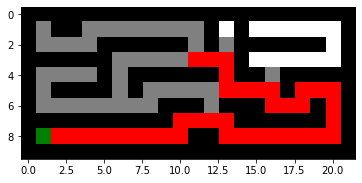

Path cost:  38
Explored squares:  80
Maximum size of the frontier:  45
Maximum tree depth:  38


Running GBFS with Manhattan Distance and medium_maze.txt


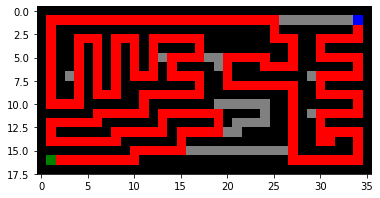

Path cost:  234
Explored squares:  273
Maximum size of the frontier:  234
Maximum tree depth:  234


Running GBFS with Manhattan Distance and large_maze.txt


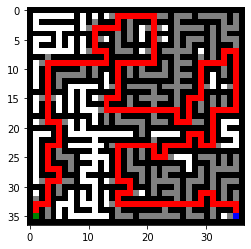

Path cost:  210
Explored squares:  461
Maximum size of the frontier:  210
Maximum tree depth:  210


Running GBFS with Manhattan Distance and empty_maze.txt


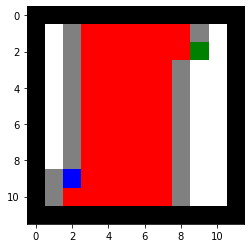

Path cost:  54
Explored squares:  73
Maximum size of the frontier:  54
Maximum tree depth:  54


Running GBFS with Manhattan Distance and wall_maze.txt


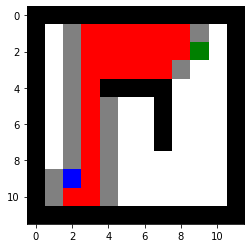

Path cost:  26
Explored squares:  44
Maximum size of the frontier:  26
Maximum tree depth:  26


Running GBFS with Manhattan Distance and loops_maze.txt


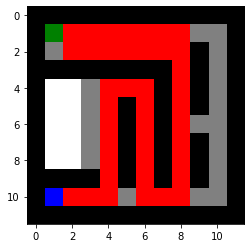

Path cost:  41
Explored squares:  61
Maximum size of the frontier:  41
Maximum tree depth:  41


Running GBFS with Manhattan Distance and open_maze.txt


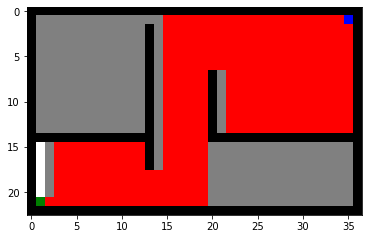

Path cost:  378
Explored squares:  677
Maximum size of the frontier:  477
Maximum tree depth:  378


Running GBFS with Euclidean Distance and small_maze.txt


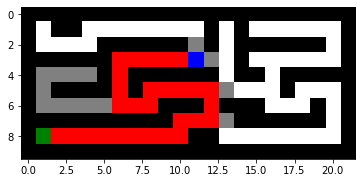

Path cost:  29
Explored squares:  43
Maximum size of the frontier:  29
Maximum tree depth:  29


Running GBFS with Euclidean Distance and medium_maze.txt


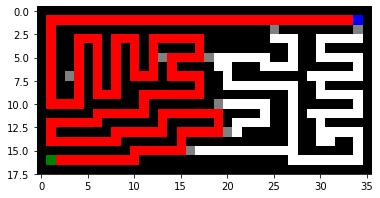

Path cost:  162
Explored squares:  170
Maximum size of the frontier:  162
Maximum tree depth:  162


Running GBFS with Euclidean Distance and large_maze.txt


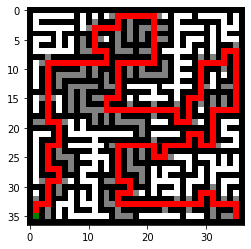

Path cost:  211
Explored squares:  367
Maximum size of the frontier:  210
Maximum tree depth:  211


Running GBFS with Euclidean Distance and empty_maze.txt


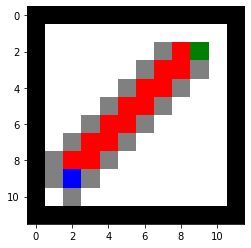

Path cost:  14
Explored squares:  30
Maximum size of the frontier:  14
Maximum tree depth:  14


Running GBFS with Euclidean Distance and wall_maze.txt


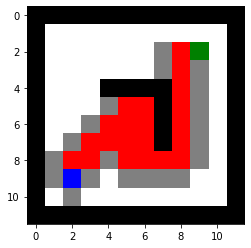

Path cost:  22
Explored squares:  42
Maximum size of the frontier:  22
Maximum tree depth:  22


Running GBFS with Euclidean Distance and loops_maze.txt


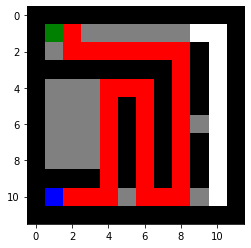

Path cost:  35
Explored squares:  60
Maximum size of the frontier:  35
Maximum tree depth:  35


Running GBFS with Euclidean Distance and open_maze.txt


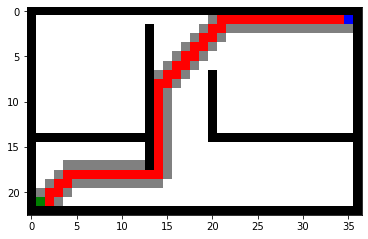

Path cost:  54
Explored squares:  115
Maximum size of the frontier:  54
Maximum tree depth:  54



In [80]:
def GBFS_AM_SearchRunner(vis):
    mazes = []    
    mazes.append("small_maze.txt")
    mazes.append("medium_maze.txt")
    mazes.append("large_maze.txt")
    mazes.append("empty_maze.txt")
    mazes.append("wall_maze.txt")
    mazes.append("loops_maze.txt")
    mazes.append("open_maze.txt")

    for e in mazes:
        f = open(e, "r")
        maze_str = f.read()
        maze = helper.parse_maze(maze_str)
        print("\n===================================================")
        print("Running GBFS with Manhattan Distance and", e)
        localResult = GBFS_Search(maze,vis, "AM")
        helper.show_maze(maze)
        print("Path cost: ", localResult[0])
        print("Explored squares: ", localResult[1])
        print("Maximum size of the frontier: ", localResult[2])
        print("Maximum tree depth: ", localResult[3]) 
        print("===================================================\n")
        
def GBFS_EU_SearchRunner(vis):
    mazes = []    
    mazes.append("small_maze.txt")
    mazes.append("medium_maze.txt")
    mazes.append("large_maze.txt")
    mazes.append("empty_maze.txt")
    mazes.append("wall_maze.txt")
    mazes.append("loops_maze.txt")
    mazes.append("open_maze.txt")

    for e in mazes:
        f = open(e, "r")
        maze_str = f.read()
        maze = helper.parse_maze(maze_str)
        print("\n===================================================")
        print("Running GBFS with Euclidean Distance and", e)
        localResult = GBFS_Search(maze,vis, "EU")
        helper.show_maze(maze)
        print("Path cost: ", localResult[0])
        print("Explored squares: ", localResult[1])
        print("Maximum size of the frontier: ", localResult[2])
        print("Maximum tree depth: ", localResult[3]) 
        print("===================================================\n")
        
GBFS_AM_SearchRunner(False)
GBFS_EU_SearchRunner(False)

#### Greedy Best-First Search Analysis
The Greedy Best-First Search algorithm will find the shortest neighbour based on the distance between the goal and the current (There are two type of distances I used). It will always to the next node with shortest h(n).
* Since the code will check visited place and do back-tracking, so it is complete in this case.
* The shortest h(n) doesn't always equal to the shortest path, so it is not optimal.
* The Time Complexity is from O(bd) to O(b^m) depends on how the heuristic works.
* The Space Complexity is O(b^m).

## Task 4: A* Search [3 points]

Use again the Manhattan heuristic function.

In [82]:
def Find_F_Distance(maze, Node, Root, NodeonTree, End, Dtype):                 # A function for f(n)
    Total = 0
    while(NodeonTree != Root):
        NodeonTree = NodeonTree.getParent()
        Total = Total + 1

    if(Dtype == "MA"):
        Total = Total  + abs(Node[0] - End[0]) + abs(Node[1] - End[1])
    elif(Dtype == "EU"):
        Total = Total  +  math.sqrt((abs(Node[0] - End[0]))**2 + (abs(Node[1] - End[1]))**2)
        
    return Total

def Find_A_Star_Children(maze, Node, Root, NodeonTree, End, Dtype):
    Children = []
    
    NewPath = []
    Visited = 0
    while(NodeonTree != Root):
        NewPath.append(NodeonTree.data)
        NodeonTree = NodeonTree.getParent()
        Visited = Visited + 1
    NewPath.append(NodeonTree.data)
    Visited = Visited + 1                   # Rebuild the path based on the node on tree
    
    West = [Node[0], Node[1]-1]
    if(helper.look(maze, West) != 'X' and West not in NewPath):
        Children.append(West)
        
    North = [Node[0]-1, Node[1]]
    if(helper.look(maze, North) != 'X' and North not in NewPath):
        Children.append(North)
        
    East = [Node[0], Node[1] + 1]
    if(helper.look(maze, East) != 'X' and East not in NewPath):
        Children.append(East)
        
    South = [Node[0]+ 1, Node[1]]
    if(helper.look(maze, South) != 'X' and South not in NewPath):
        Children.append(South)
    
    return Children                             # Return a list of options that it can go
    

def UpdateMaze(maze, NodeonTree, vis):
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if(maze[i][j] == 'P'):          
                maze[i][j] = '.'            # The original path becomes explored
                
    path = []
    while(NodeonTree.isRoot() == False):
        path.append(NodeonTree.data)
        NodeonTree = NodeonTree.getParent() # Get the new path
    
    for e in path:
        maze[e[0]][e[1]] = 'P'             # Put new path to red
    if(len(path) != 0):
        maze[path[0][0]][path[0][1]] = '.'  # The head is still under exploration
    if(vis == True):
        helper.show_maze(maze)
    return path

def A_Star_Search(maze, vis, Dtype):
    Start = helper.find_pos(maze, what = "S")            
    End = helper.find_pos(maze, what = "G")
    Result = []
    MaxFrontier = 1
    MaxDepth = 1
    counter = 0                     # a counter to identify paths with same distance
    if(Start == End):
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        return Result
    
    q = []                          # It's a sorted list with nodes (can be built as a path by tree) from shortest f(n) to largest f(n), like priority queue
    Root = Tree(Start)
    q.append([Find_F_Distance(maze,Start,Root,Root, End, Dtype), Root, counter])
    while (len(q) != 0):
        if(len(q) > MaxFrontier):
            MaxFrontier = len(q)
        tNode = q[0].copy()        # Pull out the node with smallest f(n)
        q.pop(0)

        NodeonTree = tNode[1]
        Node = NodeonTree.data
        
        depth = Find_Distance(NodeonTree, Root)
        if(MaxDepth < depth):                               # Find the depth of the node
            MaxDepth = depth

        UpdateMaze(maze, NodeonTree, vis)           # Update maze with each new path

        if(Node == End):
            newTreeNode = Tree(Node)
            NodeonTree.addChild(newTreeNode)
            tempNode = newTreeNode.getParent()
            while(tempNode != Root):
                maze[tempNode.data[0]][tempNode.data[1]] = 'P'
                tempNode = tempNode.getParent()
            maze[End[0]][End[1]] = 'G'              # Remark Path and Destination's colors

            Result = getResult(maze)
            Result.append(MaxFrontier)
            Result.append(MaxDepth)
            return Result
        
        children = Find_A_Star_Children(maze,Node,Root,NodeonTree,End, Dtype)               # Get the children of the current path
        
        for e in children:
            counter = counter + 1                       # Update counter to make diffferent identification for the node
            newchild = Tree(e)
            NodeonTree.addChild(newchild)
            newchildDistance = Find_Distance(NodeonTree, Root)
            UpdateMaze(maze, newchild, vis)
            
            newDistance = Find_F_Distance(maze,e,Root,newchild, End, Dtype)    # Find the f(n) for that node
            
            find = False                                        # insert the new node into the sorted list 
            index = -1
            has = False
            for a in range(len(q)):
                if(e == q[a][1].data):                         # Find where the node is already in the container
                    if(newDistance < q[a][0]):
                        q[a] = [newDistance, newchild, counter] 
                    has = True
            if(has == False):                                   # Insert it into the container
                for b in range(len(q)):
                    if(newDistance < q[a][0]):
                        q.insert(a ,[newDistance, newchild, counter])
                        find = True
                        break
                    elif(newDistance == q[a][0]):
                        if(counter >= q[a][2]):
                            q.insert(a ,[newDistance, newchild, counter])
                            find = True
                            break;   
                if(find == False):
                    q.append([newDistance, newchild, counter])
                        
                
    Result.append("Path not found")
    Result.append("Path not found")
    Result.append("Path not found")
    Result.append("Path not found")
    return Result


Running A_Star Search with Manhattan Distance and small_maze.txt


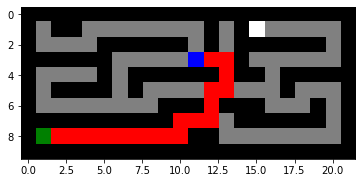

Path cost:  19
Explored squares:  92
Maximum size of the frontier:  9
Maximum tree depth:  19


Running A_Star Search with Manhattan Distance and medium_maze.txt


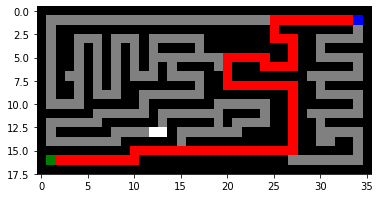

Path cost:  68
Explored squares:  271
Maximum size of the frontier:  12
Maximum tree depth:  68


Running A_Star Search with Manhattan Distance and large_maze.txt


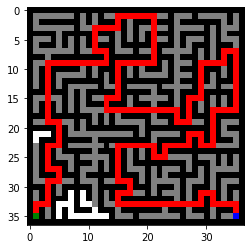

Path cost:  210
Explored squares:  622
Maximum size of the frontier:  8
Maximum tree depth:  210


Running A_Star Search with Manhattan Distance and empty_maze.txt


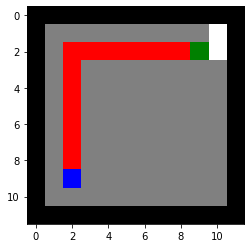

Path cost:  14
Explored squares:  97
Maximum size of the frontier:  52
Maximum tree depth:  14


Running A_Star Search with Manhattan Distance and wall_maze.txt


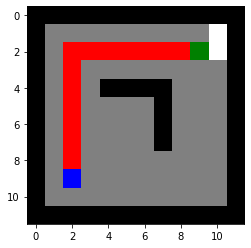

Path cost:  14
Explored squares:  90
Maximum size of the frontier:  49
Maximum tree depth:  14


Running A_Star Search with Manhattan Distance and loops_maze.txt


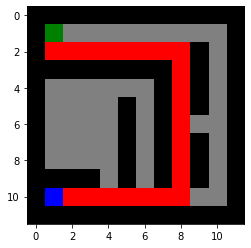

Path cost:  23
Explored squares:  71
Maximum size of the frontier:  18
Maximum tree depth:  23


Running A_Star Search with Manhattan Distance and open_maze.txt


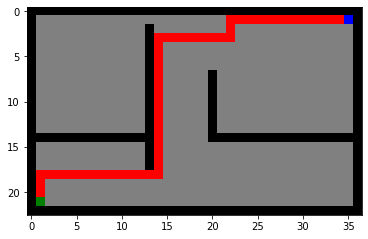

Path cost:  54
Explored squares:  683
Maximum size of the frontier:  333
Maximum tree depth:  54


Running A_Star Search with Euclidean Distance and small_maze.txt


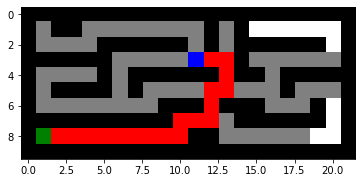

Path cost:  19
Explored squares:  82
Maximum size of the frontier:  7
Maximum tree depth:  19


Running A_Star Search with Euclidean Distance and medium_maze.txt


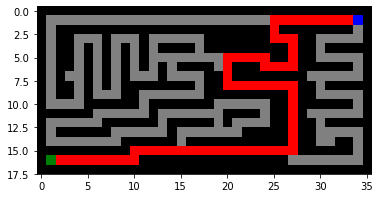

Path cost:  68
Explored squares:  273
Maximum size of the frontier:  13
Maximum tree depth:  76


Running A_Star Search with Euclidean Distance and large_maze.txt


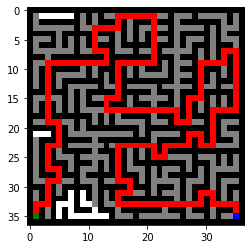

Path cost:  210
Explored squares:  617
Maximum size of the frontier:  10
Maximum tree depth:  210


Running A_Star Search with Euclidean Distance and empty_maze.txt


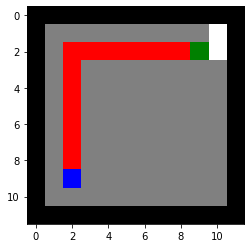

Path cost:  14
Explored squares:  97
Maximum size of the frontier:  50
Maximum tree depth:  14


Running A_Star Search with Euclidean Distance and wall_maze.txt


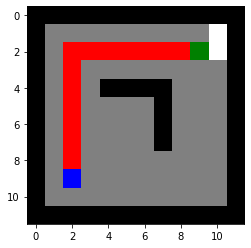

Path cost:  14
Explored squares:  90
Maximum size of the frontier:  47
Maximum tree depth:  14


Running A_Star Search with Euclidean Distance and loops_maze.txt


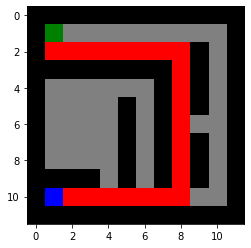

Path cost:  23
Explored squares:  71
Maximum size of the frontier:  20
Maximum tree depth:  25


Running A_Star Search with Euclidean Distance and open_maze.txt


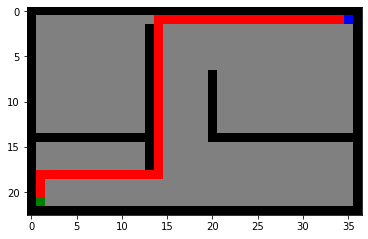

Path cost:  54
Explored squares:  683
Maximum size of the frontier:  310
Maximum tree depth:  54



In [83]:
def A_Star_AM_SearchRunner(vis):
    mazes = []    
    mazes.append("small_maze.txt")
    mazes.append("medium_maze.txt")
    mazes.append("large_maze.txt")
    mazes.append("empty_maze.txt")
    mazes.append("wall_maze.txt")
    mazes.append("loops_maze.txt")
    mazes.append("open_maze.txt")

    for e in mazes:
        f = open(e, "r")
        maze_str = f.read()
        maze = helper.parse_maze(maze_str)
        print("\n===================================================")
        print("Running A_Star Search with Manhattan Distance and", e)
        localResult = A_Star_Search(maze,vis, "AM")
        helper.show_maze(maze)
        print("Path cost: ", localResult[0])
        print("Explored squares: ", localResult[1])
        print("Maximum size of the frontier: ", localResult[2])
        print("Maximum tree depth: ", localResult[3]) 
        print("===================================================\n")
        
def A_Star_EU_SearchRunner(vis):
    mazes = []    
    mazes.append("small_maze.txt")
    mazes.append("medium_maze.txt")
    mazes.append("large_maze.txt")
    mazes.append("empty_maze.txt")
    mazes.append("wall_maze.txt")
    mazes.append("loops_maze.txt")
    mazes.append("open_maze.txt")

    for e in mazes:
        f = open(e, "r")
        maze_str = f.read()
        maze = helper.parse_maze(maze_str)
        print("\n===================================================")
        print("Running A_Star Search with Euclidean Distance and", e)
        localResult = A_Star_Search(maze,vis, "EU")
        helper.show_maze(maze)
        print("Path cost: ", localResult[0])
        print("Explored squares: ", localResult[1])
        print("Maximum size of the frontier: ", localResult[2])
        print("Maximum tree depth: ", localResult[3]) 
        print("===================================================\n")
        
A_Star_AM_SearchRunner(False)
A_Star_EU_SearchRunner(False)

#### A* Search Analysis
It is similar to GBFS, but it will find the shortest node based on f(n). It uses a container to store all the options (sorted based on f(n)), and it will always pick the first path.
* It is complete because it will record visited place to avoid infinity loop.
* It is optimal because it will always use the path with best f(n)
* Its Time Complexity may be less that exponential because the container will always store the shortest path from A to B (If it finds A to C to B it will remove it)
* Its Space Complexity may also be less that exponential.

Don't forget to add a table that compares the following for the algorithms on the different mazes:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth searched
* Maximum size of the frontier.

### Analysis

#### Since I'm not a good python table maker, I put all the data into excel and make the tables.

#### Path Cost:
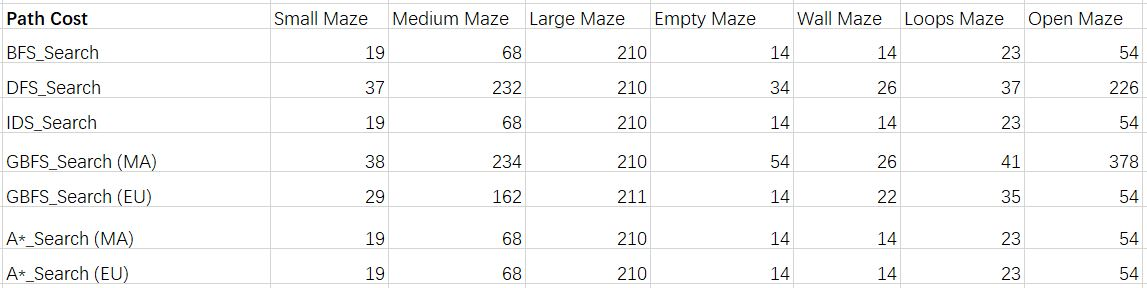
From the table we can find out that BFS,IDS,and A* will always find the shortest path.

#### Explored Squares
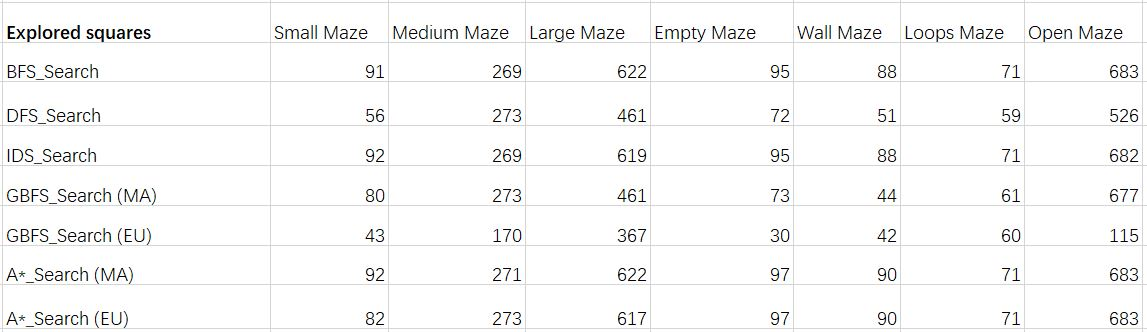
The table shows that the algorithms that can find shortest path need to explore a huge amount of space, nor alogorithms like DFS and GBFS.

#### Maximum size of the frontier
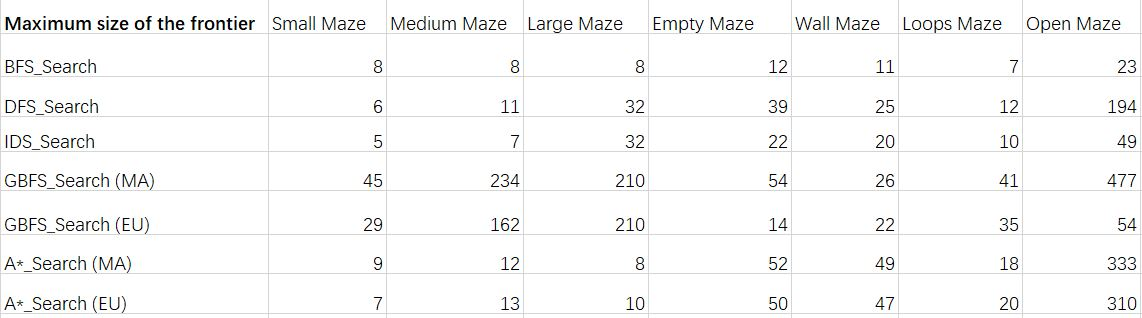
I used Queue for BFS, Stack for DFS, IDS, and GBFS. I used a Sorted List (like a priority queue) to store the nodes for A*

#### Maximum tree depth
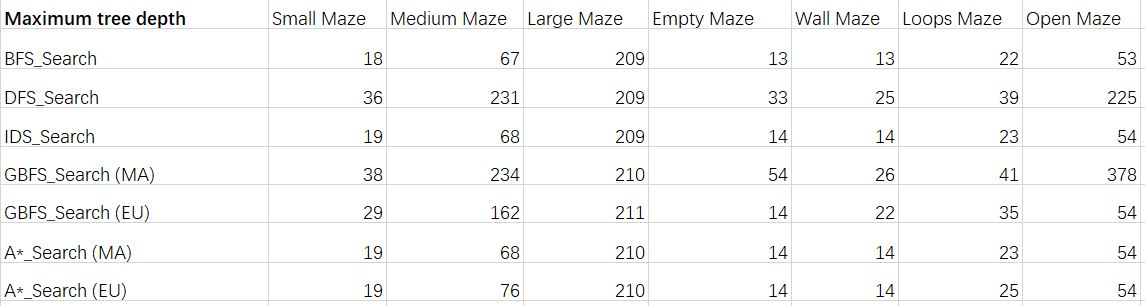
Algorithms like DFS(or GBFS) will go to the deep layer and find a long path, so the tree, used to store paths, is high. 

## Bonus Tasks [+1 point]

Instead of defining each square as a state (which you probably did), use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length in number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

Although I didn't write code for this question (not sure how to make only intersections as states), I'm thinking that a state can also be the distance with obstacles. By monitoring the distances between obstacles(North, South, East, and West), we can implement BFS and IDS as what we did before, but instead of looping with depth, we can loop through the distance with obstacles. 

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [88]:
def Find_Weightd_F_Distance(maze, Node, Root, NodeonTree, End, Dtype, Weight):                 # A function for f(n)
    Total = 0
    while(NodeonTree != Root):
        NodeonTree = NodeonTree.getParent()
        Total = Total + 1

    if(Dtype == "MA"):
        Total = Total  + Weight * ( abs(Node[0] - End[0]) + abs(Node[1] - End[1]))    # Here it becomes Weight * h(n)
    elif(Dtype == "EU"):
        Total = Total  + Weight * ( math.sqrt((abs(Node[0] - End[0]))**2 + (abs(Node[1] - End[1]))**2) )
        
    return Total


def Weighted_A_Star_Search(maze, vis, Dtype, Weight):
    Start = helper.find_pos(maze, what = "S")            
    End = helper.find_pos(maze, what = "G")
    Result = []
    MaxFrontier = 1
    MaxDepth = 1
    counter = 0                     # a counter to identify paths with same distance
    if(Start == End):
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        Result.append("Start is End")
        return Result
    
    q = []                          # It's a sorted list with nodes (can be built as a path by tree) from shortest f(n) to largest f(n), like priority queue
    Root = Tree(Start)
    q.append([Find_Weightd_F_Distance(maze,Start,Root,Root, End, Dtype, Weight), Root, counter])
    while (len(q) != 0):
        if(len(q) > MaxFrontier):
            MaxFrontier = len(q)
        tNode = q[0].copy()        # Pull out the node with smallest f(n)
        q.pop(0)

        NodeonTree = tNode[1]
        Node = NodeonTree.data
        
        depth = Find_Distance(NodeonTree, Root)
        if(MaxDepth < depth):                               # Find the depth of the node
            MaxDepth = depth

        UpdateMaze(maze, NodeonTree, vis)           # Update maze with each new path

        if(Node == End):
            newTreeNode = Tree(Node)
            NodeonTree.addChild(newTreeNode)
            tempNode = newTreeNode.getParent()
            while(tempNode != Root):
                maze[tempNode.data[0]][tempNode.data[1]] = 'P'
                tempNode = tempNode.getParent()
            maze[End[0]][End[1]] = 'G'              # Remark Path and Destination's colors

            Result = getResult(maze)
            Result.append(MaxFrontier)
            Result.append(MaxDepth)
            return Result
        
        children = Find_A_Star_Children(maze,Node,Root,NodeonTree,End, Dtype)               # Get the children of the current path
        
        for e in children:
            counter = counter + 1                       # Update counter to make diffferent identification for the node
            newchild = Tree(e)
            NodeonTree.addChild(newchild)
            newchildDistance = Find_Distance(NodeonTree, Root)
            UpdateMaze(maze, newchild, vis)
            
            newDistance = Find_Weightd_F_Distance(maze,e,Root,newchild, End, Dtype, Weight)    # Find the f(n) for that node
            
            find = False                                        # insert the new node into the sorted list 
            index = -1
            has = False
            for a in range(len(q)):
                if(e == q[a][1].data):                         # Find where the node is already in the container
                    if(newDistance < q[a][0]):
                        q[a] = [newDistance, newchild, counter] 
                    has = True
            if(has == False):                                   # Insert it into the container
                for b in range(len(q)):
                    if(newDistance < q[a][0]):
                        q.insert(a ,[newDistance, newchild, counter])
                        find = True
                        break
                    elif(newDistance == q[a][0]):
                        if(counter >= q[a][2]):
                            q.insert(a ,[newDistance, newchild, counter])
                            find = True
                            break;   
                if(find == False):
                    q.append([newDistance, newchild, counter])
    Result.append("Path not found")
    Result.append("Path not found")
    Result.append("Path not found")
    Result.append("Path not found")
    return Result


Running Weighted A_Star Search with Euclidean Distance and open_maze.txt


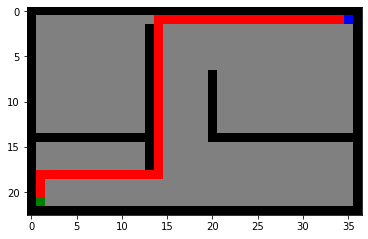

Path cost:  54
Explored squares:  683
Maximum size of the frontier:  298
Maximum tree depth:  54



In [97]:
f = open("open_maze.txt", "r")
maze_str = f.read()
maze = helper.parse_maze(maze_str)
print("\n===================================================")
print("Running Weighted A_Star Search with Euclidean Distance and open_maze.txt")
localResult = Weighted_A_Star_Search(maze,False, "EU", 2)    # 5 is the weight
helper.show_maze(maze)
print("Path cost: ", localResult[0])
print("Explored squares: ", localResult[1])
print("Maximum size of the frontier: ", localResult[2])
print("Maximum tree depth: ", localResult[3]) 
print("===================================================\n") 

#### Weighted A* Analysis
I add another parameter as the weight and use it to time with h(n). Although the result is the same (may be because the maze is still very small), but adding weight do make the program faster (around half a second on my local machine). However, I've found out that if the weight is too big, it will not be that efficient.

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

1: If the environment is partially observable, then the agent will not know where are the obstacles and where are the goals; it doesn't even know where it is.

2: Then the PEAS description will be 
* * Performance measure: Find the goal, or it may also be required to find the shortest one.
* * Environment: maze with obstacles (If it is a empty maze it does not have any obstacles), a sqaure as the goal.
* * Actuators: If can go North, South, East, and West if the node is available(not an obstacle)
* * Sensors: In the partially observable environment, it will only idenity squares nearby. 

3: If the environment is partially observable, GBFS and A* will not work becuase the agent cannot find where the goal is. Therefore, it will depend on the performance measure; if the measure also includes shortest path, then IDS and BFS are good choice for the agent. If it doesn't, then the agent can also be implement with DFS.

4: If the agent has a GPS to tell it where the goal is, it can use A* or GBFS to find the goal (depends on measure).